# PaperFigure3_histPerformance.py

In [4]:

import os
import numpy as np
import xarray as xr
from analysisFuncs import applyFunc, templates, ens_list, templates, plot_map
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib as mpl
import geopandas
from cartopy.io import shapereader
from shapely.geometry import Point
from glob import glob

mask = xr.open_dataset('conus_gmet_mask2.nc')['mask'].values

gcm_dict = {'ecearth3':'EC-Earth3',
           'cesmlens2':'CESM2',
           'canesm5':'CanESM5'}


## Figure 3, Supplemental Figure 4

cesmlens2 :  100
ecearth3 :  50
canesm5 :  50
cesmlens2 :  100
ecearth3 :  50
canesm5 :  50
cesmlens2 :  100
ecearth3 :  50
canesm5 :  50


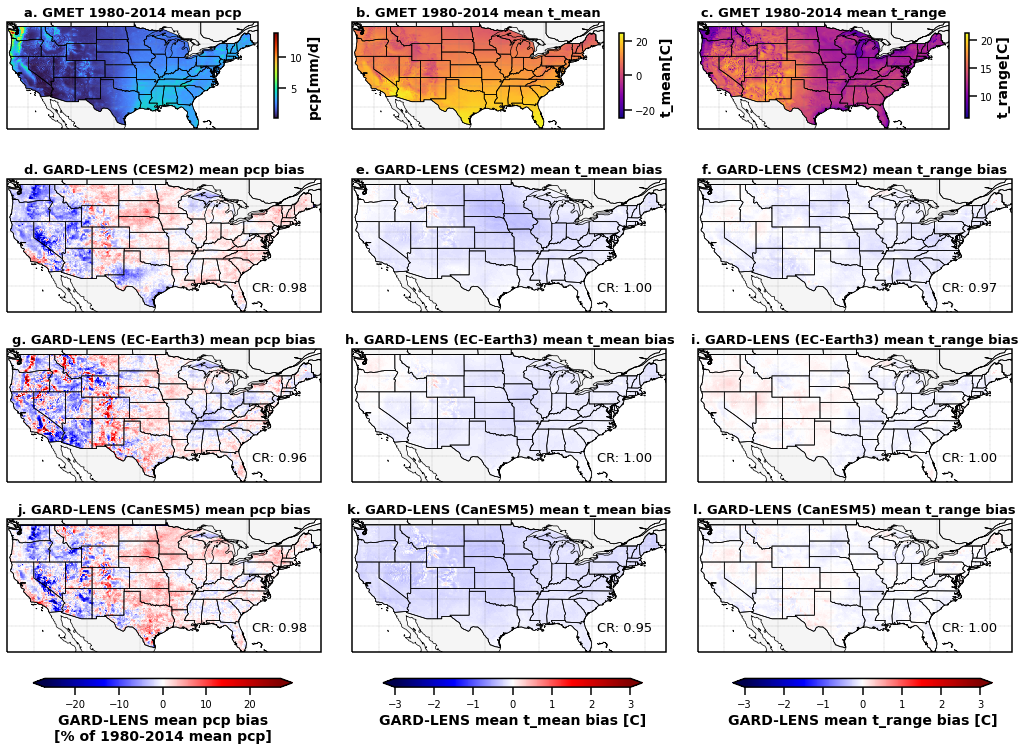

In [6]:


from matplotlib.colors import ListedColormap
import matplotlib as mpl
mpl.rcParams['hatch.linewidth'] = 0.3
mpl.rcParams['hatch.color'] = 'green'


stat = 'mean'

letters = ('a.','b.','c.','d.','e.','f.','g.','h.','i.','j.','k.','l.')

fig = plt.figure(figsize=(18,12))
proj = ccrs.PlateCarree()
ylim = (25.,50.); xlim = (-125.,-66.);

var_unit = {'pcp':'[mm/d]',
           't_mean':'[C]',
           't_range':'[C]'}

vmin = {'pcp':-27.,
           't_mean':-3.,
           't_range':-3.}

vmax = {'pcp':27.,
           't_mean':3.,
           't_range':3.}

i=1

for var in ('pcp','t_mean','t_range'):

    gardlens = xr.open_dataset('/glade/campaign/ral/hap/hartke/stat_files/GARDLENS_%s_stats_CONUS.nc'%var)

    ax1 = fig.add_subplot(4,3,i,projection=proj)
    
    gmet = xr.open_dataset('/glade/campaign/ral/hap/hartke/stat_files/GMET_stats_CONUS.nc')['%s_%s'%(var,stat)]
    gmet_mean = gmet.mean('year',skipna=True)
    plot_map(gmet_mean.where(mask),cmap='turbo' if var=='pcp' else 'plasma',ax=ax1,ylim=ylim,xlim=xlim,bottom=False,left=False,colorbar_label=var+var_unit[var])
    ax1.set_title('%s GMET 1980-2014 %s %s'%(letters[i-1],stat,var),fontsize=13)

    j=3
    for gcm in ('cesmlens2','ecearth3','canesm5'):
        
        gard = gardlens[stat].sel(n_ens=gardlens.gcm==gcm).sel(year=slice('1980','2010'))
        
        print(gcm,': ',len(gard.n_ens.values))
        
        gard_mean = gard.mean('year',skipna=True) - gmet_mean
        tot_cells = gard_mean.where(mask)[0,:,:].count(('lat','lon')).values
    
        gard_max = gard.mean('year',skipna=True).max('n_ens',skipna=True)
        gard_min = gard.mean('year',skipna=True).min('n_ens',skipna=True)
        cr = xr.full_like(gmet_mean, 1).where((gmet_mean<gard_max) & (gmet_mean>gard_min))
    
        ## --- Plot containing ratio
        ## --- Calculate and plot mean bias of GARD-LENS ensemble relative to GMET
        ax1 = fig.add_subplot(4,3,i+j,projection=proj)

        if var=='pcp':
            gard_mean = 100*gard_mean.mean('n_ens')/gmet_mean
        else: gard_mean = gard_mean.mean('n_ens')
        plot_map(gard_mean.where(mask),cmap='seismic',ax=ax1,ylim=ylim,xlim=xlim,vmin=vmin[var],vmax=vmax[var],
                 colorbar=False,bottom=False,left=False)
    
        # To plot areas where ensemble range captures historical obs
        # lons, lats = np.meshgrid(cr.lon, cr.lat)
        # plt.pcolor(lons, lats, cr.where(mask),alpha=0.02,cmap='Greys',vmax=1.,vmin=0.,hatch='ooo') ## , hatch='xx'
        
        cr = (cr.where(mask).count().values/tot_cells)
        ax1.annotate('CR: %.02f'%cr,xy=(-79.,29.),xycoords='data',fontsize=13)
        ax1.set_title('%s GARD-LENS (%s) %s %s bias'%(letters[i+j-1],gcm_dict[gcm],stat,var),fontsize=13)
        j+=3
    
        
    i+=1




xloc = 0.145
for var in ('pcp','t_mean','t_range'):
    if var=='pcp':
        label = 'GARD-LENS {stat} {var} bias\n[% of 1980-2014 {stat} {var}]'.format(stat=stat,var=var)
    else:
        label = 'GARD-LENS {stat} {var} bias [C]'.format(stat=stat,var=var)
    ax2 = fig.add_axes([xloc, 0.09, 0.2, 0.01])
    cb = mpl.colorbar.ColorbarBase(ax2, orientation='horizontal', 
                                   cmap='seismic',
                                   norm=mpl.colors.Normalize(vmin[var], vmax[var]),  # vmax and vmin
                                   extend='both',
                                   label=label)
    xloc+=0.27

plt.subplots_adjust(wspace=0.1)
plt.savefig('../figures/GARDLENS_annual_%s_bias_map_CONUS.jpg'%(stat),bbox_inches='tight',dpi=1200)

plt.show()

## Supplemental Figure 5

cesmlens2 :  100
ecearth3 :  50
canesm5 :  50
cesmlens2 :  100
ecearth3 :  50
canesm5 :  50
cesmlens2 :  100
ecearth3 :  50
canesm5 :  50


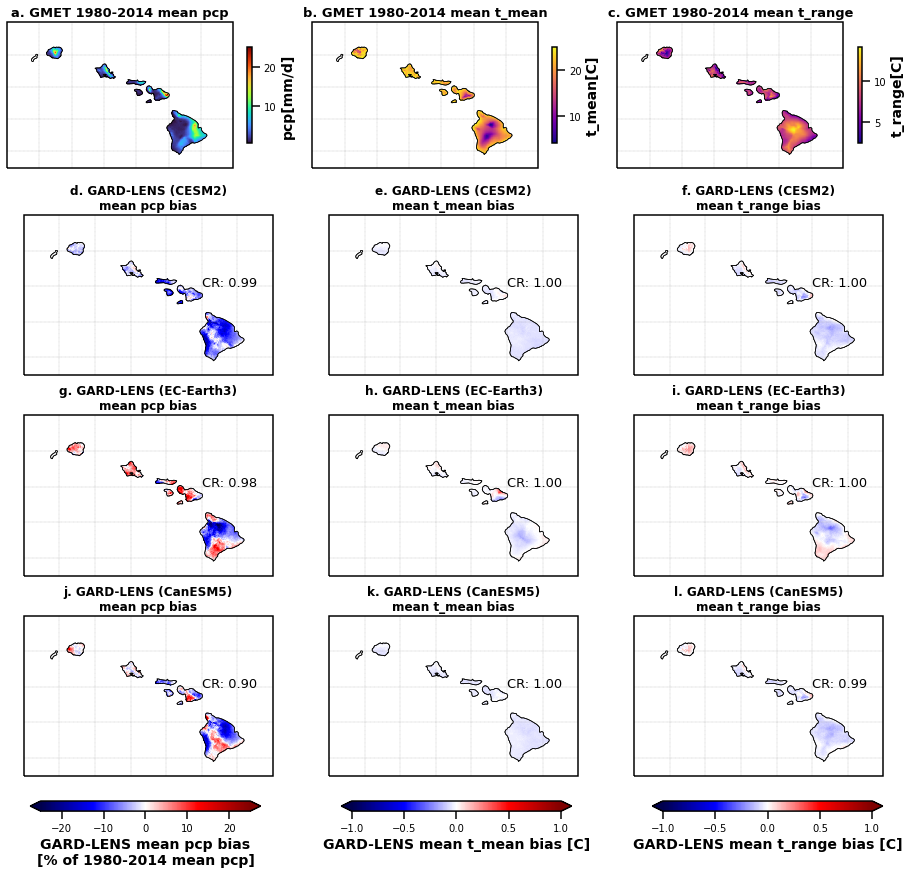

In [26]:


from matplotlib.colors import ListedColormap
import matplotlib as mpl
mpl.rcParams['hatch.linewidth'] = 0.3
mpl.rcParams['hatch.color'] = 'green'


stat = 'mean'

letters = ('a.','b.','c.','d.','e.','f.','g.','h.','i.','j.','k.','l.')

fig = plt.figure(figsize=(16,14))
proj = ccrs.PlateCarree()
ylim = (18.5,23.); xlim = (-161.,-154.)

var_unit = {'pcp':'[mm/d]',
           't_mean':'[C]',
           't_range':'[C]'}

vmin = {'pcp':-25.,
           't_mean':-1.,
           't_range':-1.}

vmax = {'pcp':25.,
           't_mean':1.,
           't_range':1.}

i=1

for var in ('pcp','t_mean','t_range'):

    ax1 = fig.add_subplot(4,3,i,projection=proj)
    
    gmet = xr.open_dataset('/glade/campaign/ral/hap/hartke/stat_files/GMET_stats_HI.nc')
    gmet_mean = gmet.mean('year',skipna=True)
    gmet_mean['lon'] = gmet_mean['longitude'].values;gmet_mean['lat'] = gmet_mean['latitude'].values
    gmet_mean = gmet_mean['%s_%s'%(var,stat)]
    plot_map(gmet_mean,cmap='turbo' if var=='pcp' else 'plasma',ax=ax1,ylim=ylim,xlim=xlim,
             bottom=False,left=False,colorbar_label=var+var_unit[var])
    ax1.set_title('%s GMET 1980-2014 %s %s'%(letters[i-1],stat,var),fontsize=13)

    ds = xr.open_dataset('/glade/campaign/ral/hap/hartke/stat_files/GARDLENS_%s_stats_HI.nc'%(var))
    
    j=3
    for gcm in ('cesmlens2','ecearth3','canesm5'):

        gard = ds[stat].sel(n_ens=ds.gcm==gcm).sel(year=slice('1990','2014'))
        #gard = ds[stat].sel(year=slice('1980','2010'))
        
        print(gcm,': ',len(gard.n_ens.values))
        
        gard_mean = gard.mean('year',skipna=True) - gmet_mean.values
    
        gard_max = gard.mean('year').max('n_ens')
        gard_min = gard.mean('year').min('n_ens')
        cr = xr.full_like(gmet_mean, 1).where((gmet_mean<gard_max.values) & (gmet_mean>gard_min.values))
        tot_cells = gmet_mean.where(~np.isnan(gmet_mean),drop=True).count(('lat','lon')).values
        cr = (cr.where(~np.isnan(gmet_mean),drop=True).count().values/tot_cells)
        
        ## --- Plot containing ratio
        ## --- Calculate and plot mean bias of GARD-LENS ensemble relative to GMET
        ax1 = fig.add_subplot(4,3,i+j,projection=proj)
        
        if var=='pcp':
            gard_mean = 100*gard_mean.mean('n_ens')/gmet_mean.values
        else: gard_mean = gard_mean.mean('n_ens')
        plot_map(gard_mean,cmap='seismic',ax=ax1,ylim=ylim,xlim=xlim,vmin=vmin[var],vmax=vmax[var],
                 colorbar=False,bottom=False,left=False)
    
        # To plot areas where ensemble range captures historical obs
        # lons, lats = np.meshgrid(cr.lon, cr.lat)
        # plt.pcolor(lons, lats, cr.where(mask),alpha=0.02,cmap='Greys',vmax=1.,vmin=0.,hatch='ooo') ## , hatch='xx'
        
        ax1.annotate('CR: %.02f'%cr,xy=(-156.,21.),xycoords='data',fontsize=13)
        ax1.set_title('%s GARD-LENS (%s)\n%s %s bias'%(letters[i+j-1],gcm_dict[gcm],stat,var),fontsize=12)
        j+=3
    
        
    i+=1



xloc = 0.145
for var in ('pcp','t_mean','t_range'):
    if var=='pcp':
        label = 'GARD-LENS {stat} {var} bias\n[% of 1980-2014 {stat} {var}]'.format(stat=stat,var=var)
    else:
        label = 'GARD-LENS {stat} {var} bias [C]'.format(stat=stat,var=var)
    ax2 = fig.add_axes([xloc, 0.09, 0.2, 0.01])
    cb = mpl.colorbar.ColorbarBase(ax2, orientation='horizontal', 
                                   cmap='seismic',
                                   norm=mpl.colors.Normalize(vmin[var], vmax[var]),  # vmax and vmin
                                   extend='both',
                                   label=label)
    xloc+=0.27

plt.subplots_adjust(wspace=0.08,hspace=0.25)
plt.savefig('figures/GARDLENS_annual_%s_bias_map_HI.jpg'%(stat),bbox_inches='tight',dpi=1200)

plt.show()

## Supplemental Figure 6

pcp
cesmlens2 :  100
ecearth3 :  50
canesm5 :  50
t_mean
cesmlens2 :  75
ecearth3 :  50
canesm5 :  50
t_range
cesmlens2 :  50
ecearth3 :  50
canesm5 :  50


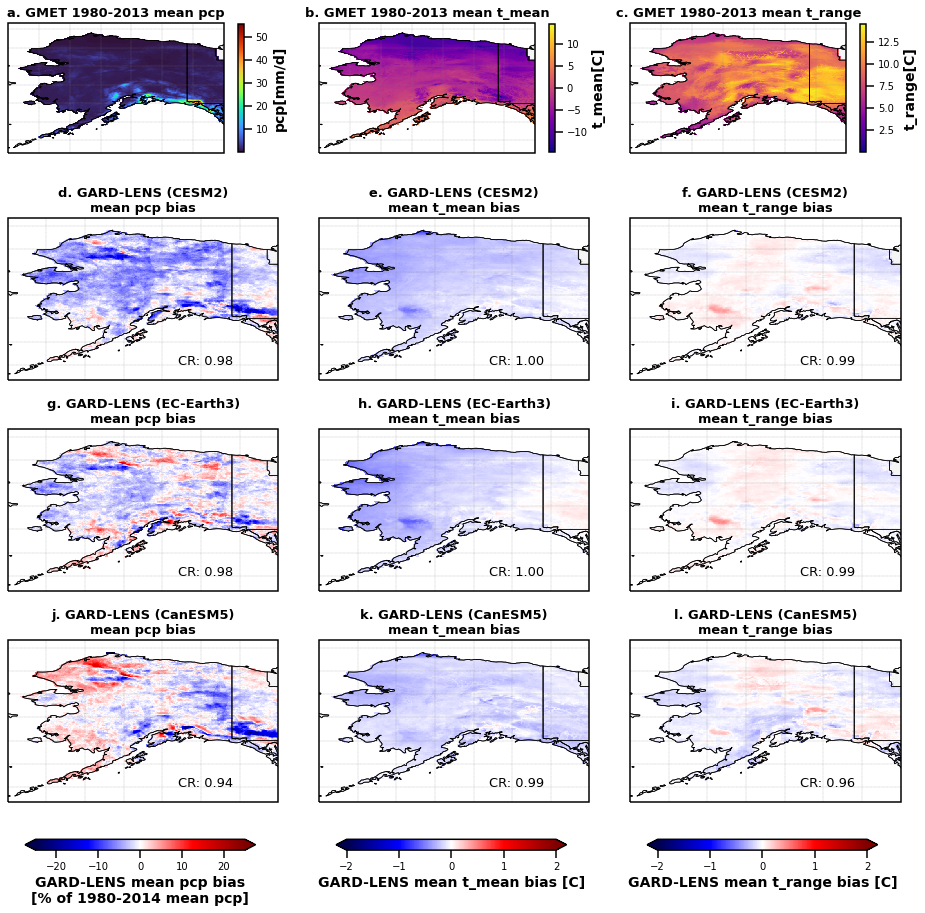

In [2]:


from matplotlib.colors import ListedColormap
import matplotlib as mpl
mpl.rcParams['hatch.linewidth'] = 0.3
mpl.rcParams['hatch.color'] = 'green'


stat = 'mean'

letters = ('a.','b.','c.','d.','e.','f.','g.','h.','i.','j.','k.','l.')
fig = plt.figure(figsize=(16,15))
proj = ccrs.PlateCarree()
ylim = (52.,73.); xlim = (-170.,-135.)

var_unit = {'pcp':'[mm/d]',
           't_mean':'[C]',
           't_range':'[C]'}

vmin = {'pcp':-25.,
           't_mean':-2.,
           't_range':-2.}

vmax = {'pcp':25.,
           't_mean':2.,
           't_range':2.}

i=1

for var in ('pcp','t_mean','t_range'):

    print(var)

    ax1 = fig.add_subplot(4,3,i,projection=proj)
    
    gmet = xr.open_dataset('/glade/campaign/ral/hap/hartke/stat_files/GMET_stats_AK.nc')
    gmet_mean = gmet['%s_%s'%(var,stat)].mean('year',skipna=True)
    plot_map(gmet_mean,cmap='turbo' if var=='pcp' else 'plasma',ax=ax1,ylim=ylim,xlim=xlim,
             bottom=False,left=False,colorbar_label=var+var_unit[var],shrink=0.7)
    ax1.set_title('%s GMET 1980-2013 %s %s'%(letters[i-1],stat,var),fontsize=13)
    
    pos1 = ax1.get_position()
    # Adjust the positions to shift to the right
    shift = 0.1  # Amount to shift to the right
    ax1.set_position([pos1.x0 + shift, pos1.y0, pos1.width, pos1.height])


    j=3
    for gcm in ('cesmlens2','ecearth3','canesm5'):
        
        ds = xr.open_dataset('/glade/campaign/ral/hap/hartke/stat_files/GARDLENS_%s_%s_stats__AK.nc'%(gcm,var))
        try: gardlens = ds.assign(y=ds.lat[:,0].values).assign(x=ds.lon[0,:].values-360).drop_vars(('lat','lon')).rename({'y':'lat','x':'lon'})
        except: gardlens = ds
        
        gard = gardlens[stat].sel(year=slice('1980','2013'))
        
        print(gcm,': ',len(gard.n_ens.values))
        
        gard_mean = gard.mean('year',skipna=True) - gmet_mean.values
    
        gard_max = gard.mean('year').max('n_ens')
        gard_min = gard.mean('year').min('n_ens')
        cr = xr.full_like(gmet_mean, 1).where((gmet_mean<gard_max.values) & (gmet_mean>gard_min.values))
        tot_cells = gmet_mean.where(~np.isnan(gmet_mean),drop=True).count(('lat','lon')).values
        cr = (cr.where(~np.isnan(gmet_mean),drop=True).count().values/tot_cells)
    
        ## --- Plot containing ratio
        ## --- Calculate and plot mean bias of GARD-LENS ensemble relative to GMET
        ax1 = fig.add_subplot(4,3,i+j,projection=proj)

        if var=='pcp':
            gard_mean = 100*gard_mean.mean('n_ens')/gmet_mean.values
        else: gard_mean = gard_mean.mean('n_ens')
        plot_map(gard_mean,cmap='seismic',ax=ax1,ylim=ylim,xlim=xlim,vmin=vmin[var],vmax=vmax[var],
                     colorbar=False,bottom=False,left=False)
    
        # To plot areas where ensemble range captures historical obs
        # lons, lats = np.meshgrid(cr.lon, cr.lat)
        # plt.pcolor(lons, lats, cr.where(mask),alpha=0.02,cmap='Greys',vmax=1.,vmin=0.,hatch='ooo') ## , hatch='xx'
        
        ax1.annotate('CR: %.02f'%cr,xy=(-148.,54.),xycoords='data',fontsize=13)
        ax1.set_title('%s GARD-LENS (%s)\n%s %s bias'%(letters[i+j-1],gcm_dict[gcm],stat,var),fontsize=13)
        j+=3
    
        
    i+=1



xloc = 0.14
for var in ('pcp','t_mean','t_range'):
    if var=='pcp':
        label = 'GARD-LENS {stat} {var} bias\n[% of 1980-2014 {stat} {var}]'.format(stat=stat,var=var)
    else:
        label = 'GARD-LENS {stat} {var} bias [C]'.format(stat=stat,var=var)
    ax2 = fig.add_axes([xloc, 0.09, 0.2, 0.01])
    cb = mpl.colorbar.ColorbarBase(ax2, orientation='horizontal', 
                                   cmap='seismic',
                                   norm=mpl.colors.Normalize(vmin[var], vmax[var]),  # vmax and vmin
                                   extend='both',
                                   label=label)
    xloc+=0.27

plt.subplots_adjust(wspace=0.15, hspace=.16)
plt.savefig('figures/GARDLENS_annual_%s_bias_map_AK.jpg'%(stat),bbox_inches='tight',dpi=1200)

plt.show()